In [1]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import copy

In [37]:
# Set the threshold value
threshold = 180

path = os.getcwd()

path_train = path + '/UT_Train.png'
path_test  = path + '/UT_Test.png'

def read_binarize_img(path_img):
  # Read the image
  img_train = Image.open(path_img).convert(mode="L")
  img_train = img_train.resize(size=(100,100))
    
  # Binarize the image
  img_train_array = np.asarray(img_train,dtype=np.uint8)
  t = np.zeros(img_train_array.shape,dtype=np.float)
  t[img_train_array > threshold] = 1
  t[t==0] = -1
  return t


# Read images
train = read_binarize_img(path_train)
test = read_binarize_img(path_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


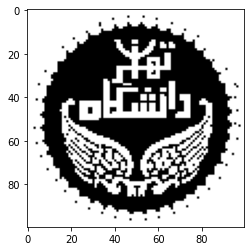

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


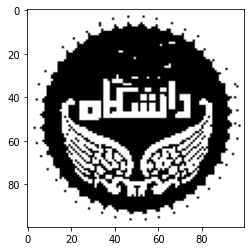

In [3]:
# Plot images
plt.imshow(np.repeat(train[:,:,np.newaxis], repeats=3, axis=2))
plt.show()
plt.imshow(np.repeat(test[:,:,np.newaxis], repeats=3, axis=2))
plt.show()

In [49]:
def polarize(mat):
  res = copy.deepcopy(mat)
  for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
      if mat[i][j] == 0:
        res[i][j] = -1
  return res

In [47]:
# Create the weights matrix
W = polarize(train.reshape((10000, 1))) @ polarize(train.reshape((1, 10000))) - np.eye(10000)
print(W)

[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


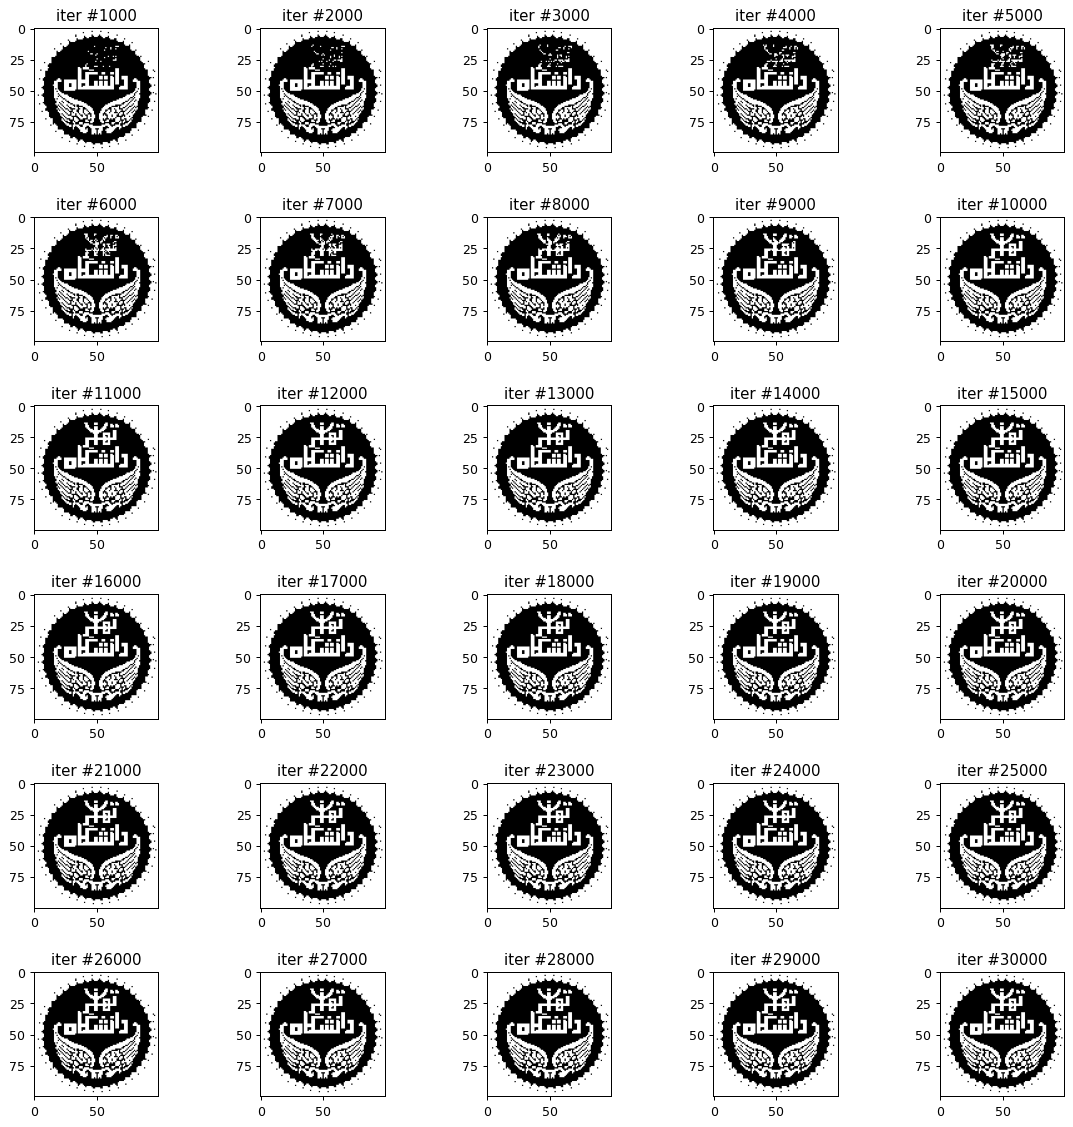

In [48]:
# Update the weights matrix until convergence
def f(inp):
  if inp > .5:
    return 1
  elif inp < .5:
    return 0
  return inp
def depict(imglist):
  imglist = list(map(lambda img: img.reshape((100, 100)), imglist))
  iter = 1000
  fig, axs = plt.subplots(6, 5, figsize=(13, 13), dpi=90)
  fig.tight_layout(pad=3.0)
  i = -1
  j = 0
  for img in imglist:
    i += 1 if (iter - 1000) % 5000 == 0 else 0
    j += 1 if (iter - 1000) % 5000 != 0 else -j
    axs[i, j].imshow(np.repeat(img[:,:,np.newaxis], repeats=3, axis=2))
    axs[i, j].set_title('iter #' + str(iter))
    iter += 1000
  plt.show()
x = test.reshape((1, 10000))
y = copy.deepcopy(x)
TotalRounds = 3
epoch = 1
imglist = []
while epoch < 10000 * TotalRounds + 1:
  randiter = np.random.choice(np.arange(10000), 10000, replace=False)
  for i in randiter:
    y_in = x[0][i] + np.sum(y[0] * W[:, i])
    y[0][i] = f(y_in)
    if epoch % 1000 == 0:
      imglist.append(copy.deepcopy(y))
    epoch += 1
depict(imglist)